In [34]:

import os
import sys
import importlib
import copy
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

from tools_pattern import get_eucledean_dist

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'distribution_123share_210512_211022'

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )

import compress_pickle

fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_all.gz')
input_graph = compress_pickle.load(fname)

# z_min = 19800
# z_max = 29800
z_min = 19800-2500
z_max = 29800+2500
# GrCs are fully reconstructed and proofread from 90k to 150k
# MFs are from 70k to 160k
x_min = 95*1000*4
x_max = 145*1000*4
# radius = 200

n_randoms = 5
replication_hist2 = defaultdict(int)
grc_ids = set()
mf_ids = set()
replicated_2shares = defaultdict(int)

def get_prob(in_graph, unique_count=False, count_within_box=True, return_counted=False):
    n_common_pairs = 0
    processed = set()
    total_n_pairs = 0
    hist = defaultdict(int)
    n = 0
    counted_grcs = 0
    for grc_i_id in in_graph.grcs:
        n += 1
        grc_i = in_graph.grcs[grc_i_id]
        x, y, z = grc_i.soma_loc
        if count_within_box:
            if x < x_min or x > x_max:
                continue
            if z < z_min or z > z_max:
                continue
        counted_grcs += 1
        grc_ids.add(grc_i_id)
        rosettes_i = set([mf[0] for mf in grc_i.edges])
        for r in rosettes_i:
            mf_ids.add(r)
        for grc_j_id in in_graph.grcs:
            if grc_i_id == grc_j_id:
                continue
            if unique_count and (grc_i_id, grc_j_id) in processed:
                continue
            processed.add((grc_i_id, grc_j_id))
            processed.add((grc_j_id, grc_i_id))
            grc_j = in_graph.grcs[grc_j_id]
            x, y, z = grc_j.soma_loc
#             if count_within_box:
#                 if x < x_min or x > x_max:
#                     continue
#                 if z < z_min or z > z_max:
#                     continue
            common_rosettes = set([mf[0] for mf in grc_j.edges])
            common_rosettes = common_rosettes & rosettes_i
            hist[len(common_rosettes)] += 1
            if len(common_rosettes) == 2:
                replication_hist2[grc_i_id] += 1
                common_rosettes = tuple(sorted(list(common_rosettes)))
                replicated_2shares[common_rosettes] += 1
    for k in hist:
        # fix 0 datapoint plots
        if hist[k] == 0:
            hist[k] = 1
    if return_counted:
        return hist, counted_grcs
    else:
        return hist

input_observed = copy.deepcopy(input_graph)
hist_data, n_grcs = get_prob(input_observed, count_within_box=True, return_counted=True)

print(n_grcs)
print(hist_data)
# n_grcs = len(input_graph.grcs)

480
defaultdict(<class 'int'>, {0: 1154933, 1: 42172, 2: 1883, 3: 50, 4: 2})


In [35]:
print(len(mf_ids))
print(n_grcs)

368
480


In [25]:
replication_hist2_list = []
for grc in grc_ids:
    if grc in replication_hist2:
        replication_hist2_list.append((grc, replication_hist2[grc]))
    else:
        replication_hist2_list.append((grc, 0))

replication_hist2_list_sorted = sorted(replication_hist2_list, key=lambda x: x[1])

In [26]:
mpd = MyPlotData()
mpd_count = MyPlotData()
i = 0
for grc_id, count in replication_hist2_list_sorted:
    mpd_count.add_data_point(
        count=count,
        grc_id=grc_id,
        i=i,
        model='Observed',
    )
    i += 1

Height: 4, Aspect: 2


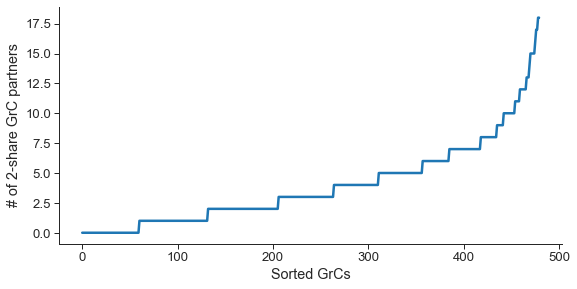

In [29]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_count,
    x='i',
    y='count',
#     kind='hist',
    context='paper',
    linewidth=2.5,
#     kde=True,
#     stat='density',
    height=4,
    aspect=2,
    y_axis_label='# of 2-share GrC partners',
    x_axis_label='Sorted GrCs',
    save_filename=f'{script_n}_line.svg',
    show=True,
    )

Height: 4, Aspect: 2


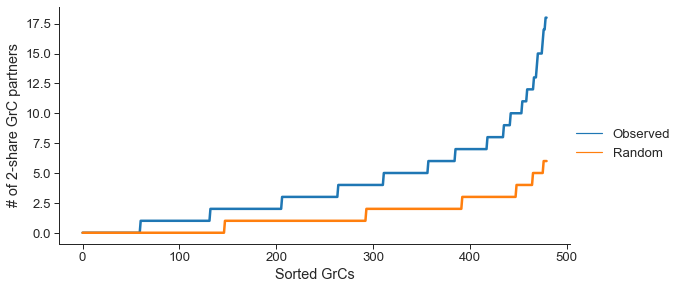

In [28]:

mpd_count_random = compress_pickle.load('distribution_123share_210512_random_wider.gz')

mpd_all = MyPlotData()
mpd_all.append(mpd_count)
mpd_all.append(mpd_count_random)
importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x='i',
    y='count',
    hue='model',
    context='paper',
    linewidth=2.5,
#     kde=True,
#     stat='density',
    height=4,
    aspect=2,
    y_axis_label='# of 2-share GrC partners',
    x_axis_label='Sorted GrCs',
    save_filename=f'{script_n}_line.svg',
    show=True,
    )

In [7]:
for grc, count in replication_hist2_list_sorted:
    print((grc, count))
    print([k[0] for k in input_graph.grcs[grc].edges])

('grc_1077', 0)
['mf_182', 'mf_58']
('grc_1150', 0)
['mf_389', 'mf_494']
('grc_1705', 0)
['mf_467', 'mf_482', 'mf_220']
('grc_422', 0)
['mf_377', 'mf_131', 'mf_72']
('grc_55', 0)
['mf_316', 'mf_121']
('grc_409', 0)
['mf_52', 'mf_62', 'mf_182']
('grc_31', 0)
['mf_19', 'mf_34']
('grc_496', 0)
['mf_19', 'mf_26']
('grc_1090', 0)
['mf_181', 'mf_94', 'mf_322']
('grc_368', 0)
['mf_66', 'mf_175', 'mf_6', 'mf_187']
('grc_205', 0)
['mf_202', 'mf_40', 'mf_184']
('grc_1239', 0)
['mf_343', 'mf_254']
('grc_32', 0)
['mf_46', 'mf_like_0', 'mf_16']
('grc_2508', 0)
['mf_575', 'mf_555', 'mf_267']
('grc_41', 0)
['mf_239', 'mf_218', 'mf_200', 'mf_196']
('grc_244', 0)
['mf_190', 'mf_200']
('grc_985', 0)
['mf_171', 'mf_88', 'mf_131', 'mf_199']
('grc_1067', 0)
['mf_170', 'mf_561', 'mf_18', 'mf_149']
('grc_1642', 0)
['mf_300', 'mf_59', 'mf_474', 'mf_438']
('grc_2135', 0)
['mf_299', 'mf_474', 'mf_18']
('grc_1589', 0)
['mf_54', 'mf_309', 'mf_293']
('grc_2059', 0)
['mf_342', 'mf_359']
('grc_241', 0)
['mf_123', 'm

In [8]:
replicated_2shares_list = [(k, v) for k, v in replicated_2shares.items()]
replicated_2shares_list.sort(key=lambda x: x[1])
for i in replicated_2shares_list:
    print(i)

(('mf_161', 'mf_584'), 1)
(('mf_161', 'mf_343'), 1)
(('mf_231', 'mf_254'), 1)
(('mf_170', 'mf_237'), 1)
(('mf_172', 'mf_9'), 1)
(('mf_161', 'mf_96'), 1)
(('mf_186', 'mf_196'), 1)
(('mf_251', 'mf_421'), 1)
(('mf_2', 'mf_566'), 1)
(('mf_2', 'mf_562'), 1)
(('mf_562', 'mf_9'), 1)
(('mf_332', 'mf_342'), 1)
(('mf_183', 'mf_321'), 1)
(('mf_183', 'mf_292'), 1)
(('mf_292', 'mf_308'), 1)
(('mf_125', 'mf_55'), 1)
(('mf_174', 'mf_213'), 1)
(('mf_79', 'mf_like_1'), 1)
(('mf_189', 'mf_206'), 1)
(('mf_267', 'mf_367'), 1)
(('mf_431', 'mf_78'), 1)
(('mf_529', 'mf_78'), 1)
(('mf_121', 'mf_533'), 1)
(('mf_120', 'mf_121'), 1)
(('mf_186', 'mf_202'), 1)
(('mf_131', 'mf_186'), 1)
(('mf_224', 'mf_254'), 1)
(('mf_224', 'mf_531'), 1)
(('mf_12', 'mf_531'), 1)
(('mf_145', 'mf_78'), 1)
(('mf_145', 'mf_367'), 1)
(('mf_384', 'mf_467'), 1)
(('mf_426', 'mf_467'), 1)
(('mf_384', 'mf_458'), 1)
(('mf_19', 'mf_77'), 1)
(('mf_183', 'mf_514'), 1)
(('mf_183', 'mf_331'), 1)
(('mf_204', 'mf_6'), 1)
(('mf_172', 'mf_250'), 1)
((

In [31]:

import tools_mf_graph
importlib.reload(tools_mf_graph)
from tools_mf_graph import GCLGraph
fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_xlim_90_140_zlim_0.0_44.0.gz')
input_graph = compress_pickle.load(fname)
input_graph.avg_edge_count_by_depth = None
input_graph.avg_dendrite_len = None
input_graph.mf_locs_set = None

n_randoms = 10
hist_random_avg = []

for n in range(n_randoms):
    # input_graph.randomize_graph(random_model=True)
    input_graph.randomize_graph_by_grc2(
        single_connection_per_pair=True,
        constant_grc_degree='depth',
        constant_dendrite_length=True,
#         always_pick_closest_rosette=True,
        )
    hist = get_prob(input_graph)
    hist_random_avg.append(hist)


Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843
Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843
Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843
Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843
Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843
Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843
Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843
Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843
Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843
Average num_claw_per_grc: 3.3192161820480406
Average dendrite len: 21843


Height: 3, Aspect: 1.3333333333333333


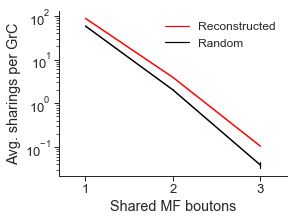

In [36]:
# n_grcs=142

mpd_data = MyPlotData()
for n_share in [1, 2, 3]:
    if n_share in hist_data:
        mpd_data.add_data_point(
            n_share=n_share,
            count=hist_data[n_share]/n_grcs,
            type='Reconstructed',
            )
#     for hist_random in hist_random_17:
#         if n_share in hist_random:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_random[n_share]/n_grcs,
#                 type='Local Random',
#                 )
    for hist_random in hist_random_avg:
        if n_share in hist_random:
            mpd_data.add_data_point(
                n_share=n_share,
                count=hist_random[n_share]/n_grcs,
                type='Random',
                )
#     for hist_random in hist_shuffle:
#         if n_share in hist_random:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_random[n_share]/n_grcs,
#                 type='Shuffle',
#                 )
#     if n_share in hist_global_random:
#         mpd_data.add_data_point(
#             n_share=n_share,
#             # need to divide by 2 because we're sampling only 2/200 grcs
#             # (or multiply others by 2)
# #             count=hist_global_random[n_share]/global_random_n_grcs/2,
#             count=hist_global_random[n_share]/global_random_n_grcs,
#             type='Global Random',
#             )

palette = {
    'Reconstructed': 'red',
    'Random': 'black',
}

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, markerscale=1, prop={'size': 12})

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_data,
    x='n_share',
    y='count',
    hue='type',
    # hue_order=['Data', 'Random Model'],
#     kind='line',
    err_style="bars",
#     ci=68,
#     markers=True,
#     dashes=False,
#     s=150,
    context='paper',
    # ylim=[.005, 50],
    xlim=[.7, 3.3],
    linewidth=1.5,
    palette=palette,
    log_scale_y=True,
    xticks=[1, 2, 3],
    height=3,
    width=4,
    y_axis_label='Avg. sharings per GrC',
    x_axis_label='Shared MF boutons',
#     save_filename=f'{script_n}_line_log.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.3333333333333333


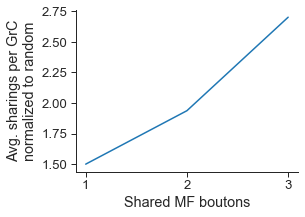

In [52]:
import statistics

mpd_data = MyPlotData()
# z_scores = {}
for n_share in [1, 2, 3]:
    vals = []
    for hist_random in hist_random_avg:
        if n_share in hist_random:
            vals.append(hist_random[n_share]/n_grcs)
    mean = sum(vals)/len(vals)
    sd = statistics.stdev(vals)
    z = (hist_data[n_share]/n_grcs - mean)/sd
    ratio = hist_data[n_share]/n_grcs / mean
#     z_scores[]
    mpd_data.add_data_point(
        n_share=n_share,
        z=z,
        ratio=ratio,
        type='Reconstructed',
        )


# for n_share in [1, 2, 3]:
#     if n_share in hist_data:
#         mpd_data.add_data_point(
#             n_share=n_share,
#             count=hist_data[n_share]/n_grcs,
#             type='Reconstructed',
#             )
#     for hist_random in hist_random_avg:
#         if n_share in hist_random:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_random[n_share]/n_grcs,
#                 type='Random',
#                 )

palette = {
    'Reconstructed': 'red',
    'Random': 'black',
}

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, markerscale=1, prop={'size': 12})

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_data,
    x='n_share',
#     y='z',
    y='ratio',
#     hue='type',
    # hue_order=['Data', 'Random Model'],
#     kind='line',
#     err_style="bars",
#     ci=68,
#     markers=True,
#     dashes=False,
#     s=150,
    context='paper',
    # ylim=[.005, 50],
#     xlim=[.7, 3.3],
    linewidth=1.5,
    palette=palette,
#     log_scale_y=True,
    xticks=[1, 2, 3],
    height=3,
    width=4,
    y_axis_label='Avg. sharings per GrC\nnormalized to random',
    x_axis_label='Shared MF boutons',
    save_filename=f'{script_n}_pct.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.3333333333333333


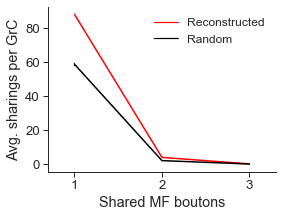

In [50]:
# n_grcs=142

mpd_data = MyPlotData()
for n_share in [1, 2, 3]:
    if n_share in hist_data:
        mpd_data.add_data_point(
            n_share=n_share,
            count=hist_data[n_share]/n_grcs,
            type='Reconstructed',
            )
#     for hist_random in hist_random_17:
#         if n_share in hist_random:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_random[n_share]/n_grcs,
#                 type='Local Random',
#                 )
    for hist_random in hist_random_avg:
        if n_share in hist_random:
            mpd_data.add_data_point(
                n_share=n_share,
                count=hist_random[n_share]/n_grcs,
                type='Random',
                )
#     for hist_random in hist_shuffle:
#         if n_share in hist_random:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_random[n_share]/n_grcs,
#                 type='Shuffle',
#                 )
#     if n_share in hist_global_random:
#         mpd_data.add_data_point(
#             n_share=n_share,
#             # need to divide by 2 because we're sampling only 2/200 grcs
#             # (or multiply others by 2)
# #             count=hist_global_random[n_share]/global_random_n_grcs/2,
#             count=hist_global_random[n_share]/global_random_n_grcs,
#             type='Global Random',
#             )

palette = {
    'Reconstructed': 'red',
    'Random': 'black',
}

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, markerscale=1, prop={'size': 12})

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_data,
    x='n_share',
    y='count',
    hue='type',
    # hue_order=['Data', 'Random Model'],
#     kind='line',
    err_style="bars",
#     ci=68,
#     markers=True,
#     dashes=False,
#     s=150,
    context='paper',
    # ylim=[.005, 50],
    xlim=[.7, 3.3],
    linewidth=1.5,
    palette=palette,
#     log_scale_y=True,
    xticks=[1, 2, 3],
    height=3,
    width=4,
    y_axis_label='Avg. sharings per GrC',
    x_axis_label='Shared MF boutons',
    save_filename=f'{script_n}_line.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


In [9]:
n_grcs=142
print(hist_data)
print(hist_random_17[0])
print(hist_data[2]/n_grcs)
print(hist_random_17[2][2]/n_grcs)
print(hist_random_avg[2][2]/n_grcs)
print(hist_shuffle[2][2]/n_grcs)
print()
print(hist_data[1]/n_grcs)
print(hist_random_17[2][1]/n_grcs)
print(hist_random_avg[2][1]/n_grcs)
print(hist_shuffle[2][1]/n_grcs)

defaultdict(<class 'int'>, {0: 212209, 1: 11624, 2: 651, 3: 18})
defaultdict(<class 'int'>, {0: 217047, 1: 7272, 2: 179, 3: 4})
4.584507042253521
1.3591549295774648
1.704225352112676
2.5492957746478875

81.85915492957747
50.41549295774648
54.04225352112676
68.80985915492958
